## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv

import matplotlib.pyplot as plt
# import os
from pylab import *
import numpy as np
from numpy import linalg as la


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

In [3]:
print("train :",train[:3])
print("test :",test[:3])
print("len(train) :",len(train))
print("len(test) :",len(test))

X_train = train[:,1:]
Y_train = train[:,:1]
X_test = test[:,1:]
Y_test = test[:,:1]

train : [[ 2.         -0.72221141  2.00447087]
 [ 2.         -0.92467912  0.48366928]
 [ 2.         -0.76602281  0.79432891]]
test : [[ 2.          0.54837733  1.2213453 ]
 [ 2.         -0.51618236  1.56239592]
 [ 2.         -0.92877833  0.92107217]]
len(train) : 100
len(test) : 200


## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


In [15]:
N1,N2 = np.count_nonzero(Y_train == 1),np.count_nonzero(Y_train == 2)
N = len(Y_train)

pi_1= N1/N
pi_2=N2/N
mu_1= np.mean(train[np.argwhere(train[:,0]==1).T],axis=1)[:,1:]
mu_2=np.mean(train[np.argwhere(train[:,0]==2).T],axis=1)[:,1:]

x1_centered = train[np.argwhere(train[:,0]==1).T][0][:,1:]-mu_1
x2_centered = train[np.argwhere(train[:,0]==2).T][0][:,1:]-mu_2

sigma_1=x1_centered.T@x1_centered/N1
sigma_2=x2_centered.T@x2_centered/N2
sigma=(N1*sigma_1+N2*sigma_2)/N


print(mu_1*sigma)
print(np.dot(mu_1,sigma))

[[-0.35869184  0.14800419]
 [-0.09804571  0.48268714]]
[[-0.21068764  0.38464143]]


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [50]:
#LDA classification
sigmaI=np.linalg.inv(sigma)
def y1_lda(x):
    return np.log(pi_1)+(x@sigmaI)@mu_1.T-0.5*(mu_1@sigma)@mu_1.T
def y2_lda(x):
    return np.log(pi_2)+(x@sigmaI)@mu_2.T-0.5*(mu_1@sigma)@mu_1.T

def predictLDA(X):
    Y_predictLDA=[]
    for x in X:
        diff=y1_lda(x)-y2_lda(x)
        if diff>0:
            Y_predictLDA.append(1)
        else:
            Y_predictLDA.append(2)
    return np.array(Y_predictLDA)


In [51]:
#QDA classification
sigma_1I=np.linalg.inv(sigma_1)
sigma_2I=np.linalg.inv(sigma_2)

def y1_qda(x):
    return np.log(pi_1)-0.5*np.log(np.linalg.det(sigma_1))-0.5*((x-mu_1)@sigma_1I)@(x-mu_1).T
def y2_qda(x):
    return np.log(pi_2)-0.5*np.log(np.linalg.det(sigma_2))-0.5*((x-mu_2)@sigma_2I)@(x-mu_2).T

def predictionQDA(X):
    Y_predictQDA=[]
    for x in X:
        diff=y1_qda(x)-y2_qda(x)
        if diff>0:
            Y_predictQDA.append(1)
        else:
            Y_predictQDA.append(2)
    return np.array(Y_predictQDA)

In [52]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)
x=np.vstack((X1.flatten('F'),X2.flatten('F'))).T # list of the coordinates of points on the grid
#N = size(x,axis=0)
# Then compute the sampled prediction class_L for each couple (X1,X2)

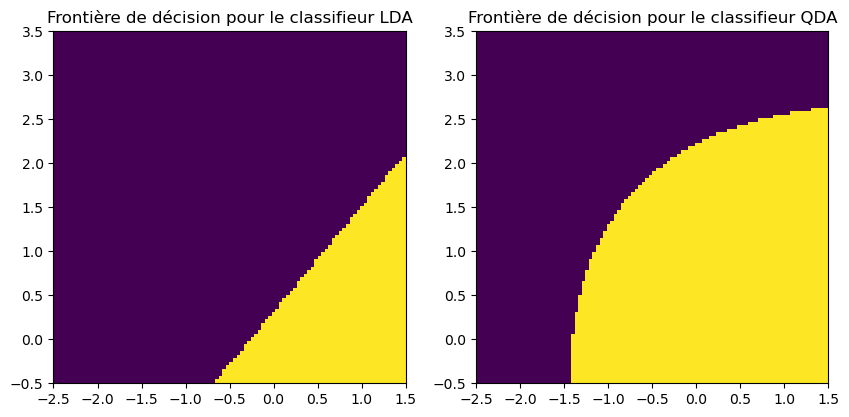

In [70]:
# For graphical representation  use code below for instance :
class_LDA =np.rot90(predictLDA(x).reshape(Nx1,Nx2))
class_QDA =np.rot90(predictionQDA(x).reshape(Nx1,Nx2))

fig,ax=plt.subplots(1,2,figsize=(10,30))
ax[0].set_title("Frontière de décision pour le classifieur LDA")
ax[0].imshow(class_LDA,extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))

ax[1].set_title("Frontière de décision pour le classifieur QDA")
ax[1].imshow(class_QDA,extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.show()

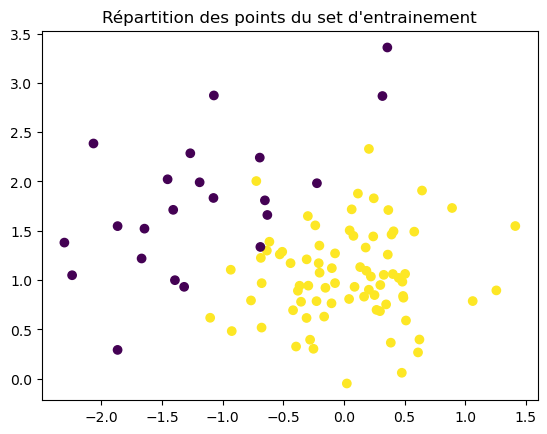

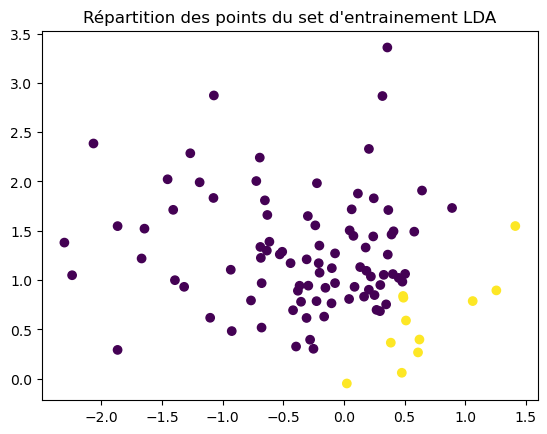

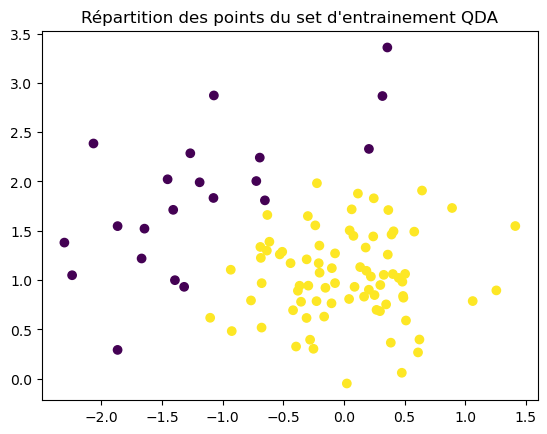

In [91]:
#Training :
Y_predict_LDA=predictLDA(X_train)
Y_predict_QDA=predictionQDA(X_train)

plt.figure()
#plt.subplot(311)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.title("Répartition des points du set d'entrainement")

#plt.subplot(312)
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_predict_LDA)
plt.title("Répartition des points du set d'entrainement LDA")

#plt.subplot(313)
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_predict_QDA)
plt.title("Répartition des points du set d'entrainement QDA")
plt.show()

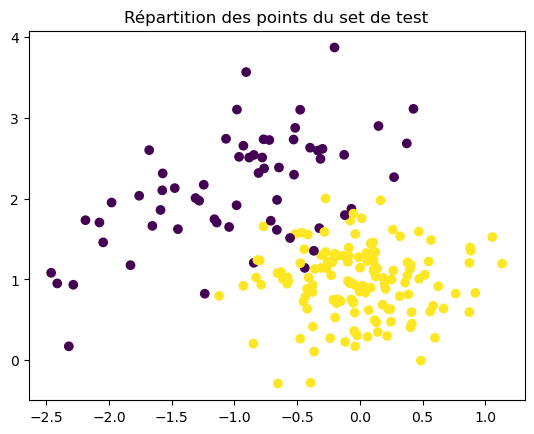

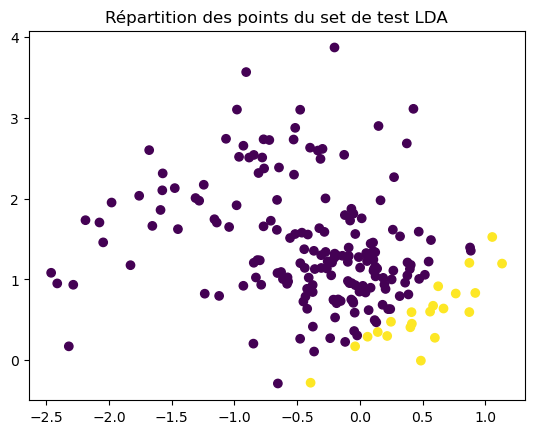

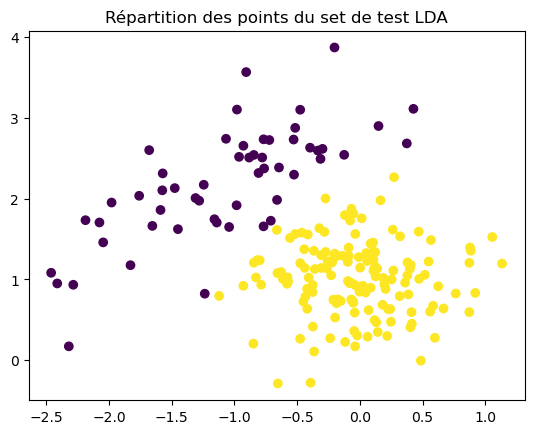

In [114]:
#Test :
Y_predict_LDA=predictLDA(X_test)
Y_predict_QDA=predictionQDA(X_test)

plt.figure()

plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
plt.title("Répartition des points du set de test")

plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=Y_predict_LDA)
plt.title("Répartition des points du set de test LDA")

plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=Y_predict_QDA)
plt.title("Répartition des points du set de test LDA")
plt.show()

In [115]:
#Calcul de l'erreur pour l'entrainement :

error_train_lda=np.sum(np.abs(Y_train - predictLDA(X_train).reshape((100,1))))/N
error_train_qda=np.sum(np.abs(Y_train - predictionQDA(X_train).reshape((100,1))))/N
print("Part d'erreur dans la classification LDA pour l'entrainement : "+str(error_train_lda*100)+"%")
print("Part d'erreur dans la classification QDA pour l'entrainement : "+str(error_train_qda*100)+"%")

Part d'erreur dans la classification LDA pour l'entrainement : 67.0%
Part d'erreur dans la classification QDA pour l'entrainement : 5.0%


In [116]:
#Calcul de l'erreur pour le test :
N_test=len(Y_test)
error_test_lda=np.sum(np.abs(Y_test - predictLDA(X_test).reshape((200,1))))/N_test
error_test_qda=np.sum(np.abs(Y_test - predictionQDA(X_test).reshape((200,1))))/N_test
print("Part d'erreur dans la classification LDA pour le test : "+str(error_test_lda*100)+"%")
print("Part d'erreur dans la classification QDA pour le test : "+str(error_test_qda*100)+"%")

Part d'erreur dans la classification LDA pour le test : 58.5%
Part d'erreur dans la classification QDA pour le test : 5.0%


## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...


